## Image Recognition


In [131]:
# Imports
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Others
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Image Manage
from PIL import Image
import requests
from io import BytesIO

# Image Rescale
import cv2

In [132]:
# Check TF Version
print(tf.__version__)

2.10.0


### Import Dataset

In [133]:
# Download Direct From Keras
## fashion_mnist = keras.datasets.fashion_mnist
##(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
# Previous Downloaded Data Set
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')


### Data Exploration

In [134]:
# Spliting Train and Test Variables

## labels
train_label = np.array(fashion_train['label'])
test_label = np.array(fashion_test['label'])

## Deleting Label Column
del fashion_train['label']
del fashion_test['label']

## Images
train_images = np.array(fashion_train).reshape(60000,28,28)
test_images = np.array(fashion_test).reshape(10000,28,28)

In [135]:
# Labels Name
class_name = ['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
             'Sandalia', 'Camisa', 'Zap.Deport', 'Bolso', 'Botines']

In [136]:
# Image Shape
train_images[0].shape

(28, 28)

In [137]:
# Train Images Shape
train_images.shape

(60000, 28, 28)

In [138]:
# Test Images Shape
test_images.shape

(10000, 28, 28)

In [139]:
# Labels
test_label[:10]

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0], dtype=int64)

In [140]:
# Min and max Values 
print('Max Value:',train_images.min())
print('Min Value:',train_images.max())

Max Value: 0
Min Value: 255


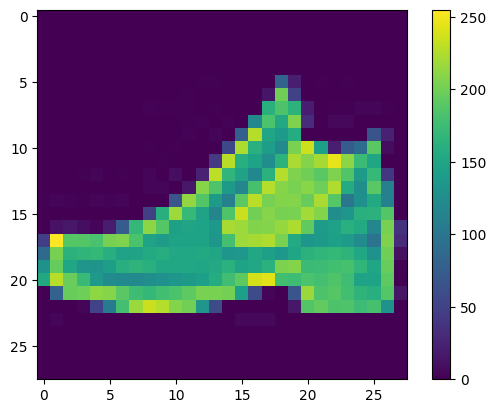

In [141]:
# Images Vizualisations
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()


### Data Pre-Proccessing

In [142]:
# Rescale the values from 0-255 to 0-1
train_images = train_images / 255
test_images = test_images / 255

In [143]:
# Min and Max Values
print('Max Value:',train_images.min())
print('Min Value:',train_images.max())

Max Value: 0.0
Min Value: 1.0


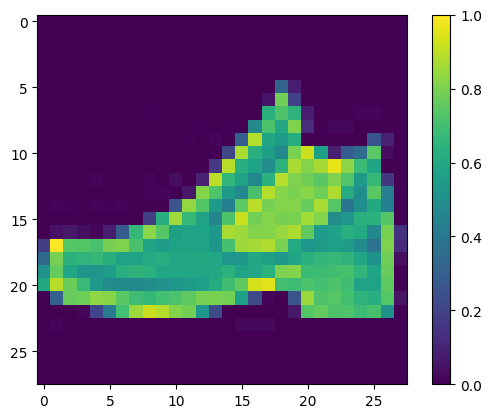

In [144]:
# Checking 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


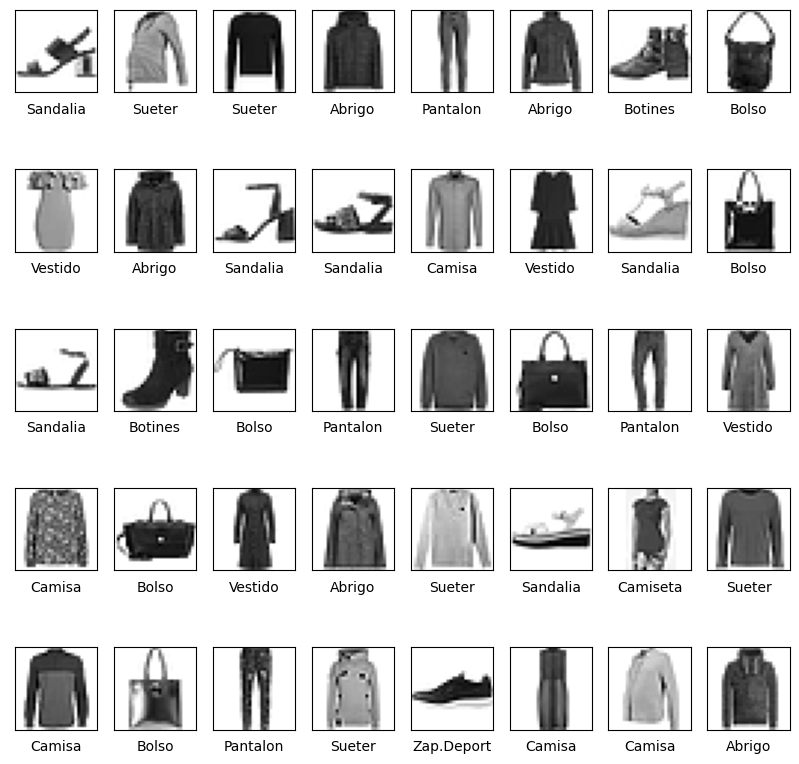

In [145]:
# Multiplot with labels
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+50], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_label[i+50]])
    
plt.show()

### Creating Model

In [146]:
# Create the Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 15)                11775     
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Compile the Model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [148]:
# Fitting the Model
model.fit(train_images, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6538 - accuracy: 0.7742
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4562 - accuracy: 0.8405
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4284 - accuracy: 0.8516
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8548
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8590
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8615
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3907 - accuracy: 0.8645
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3876 - accuracy: 0.8655
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3810 - accuracy: 0.8673
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.377

In [149]:
# Evaluating the Model
test_loss, test_acc = model.evaluate(test_images, test_label)
print('Precision ->',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3962 - accuracy: 0.8618
Precision -> 0.8618000149726868


In [150]:
# Prediction
y_prediction = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [151]:
y_prediction[0]

array([8.61356616e-01, 7.05027858e-08, 1.01024634e-04, 4.01695361e-05,
       3.25587425e-05, 5.12115696e-15, 1.38452470e-01, 9.48865291e-19,
       1.71000120e-05, 1.47258247e-19], dtype=float32)

In [152]:
np.argmax(y_prediction[0])

0

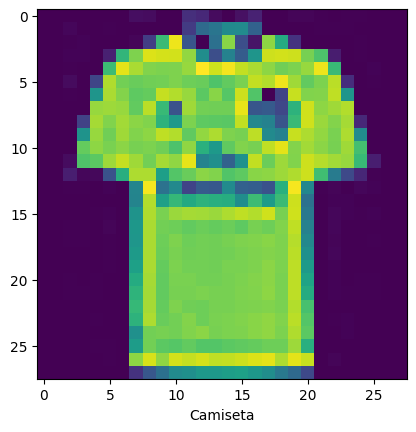

In [153]:
# Prediction Visualization
plt.imshow(test_images[0])
plt.xlabel('{}'.format(class_name[np.argmax(y_prediction[0])]))
    
plt.show()

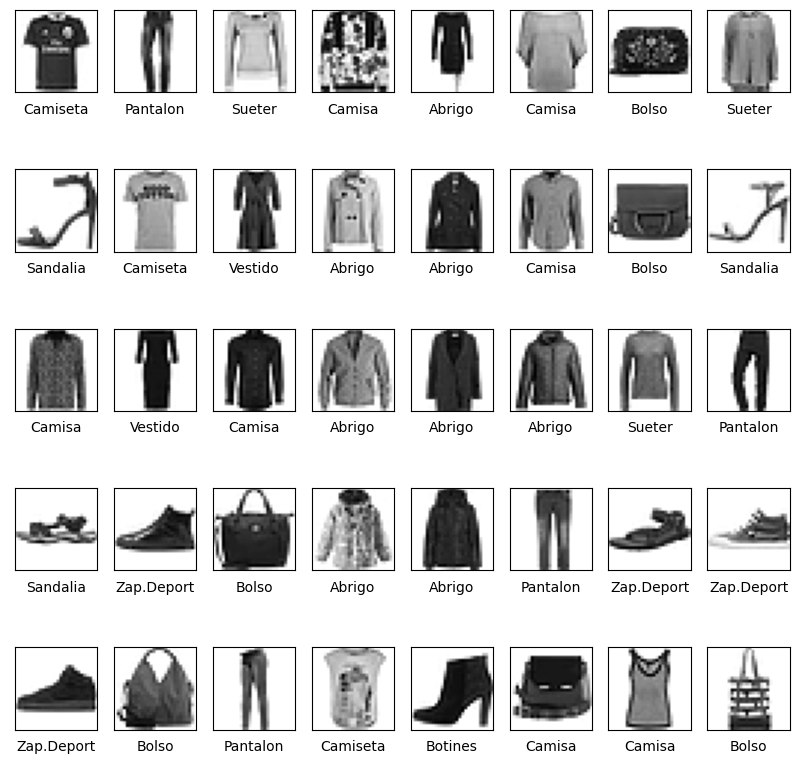

In [154]:
# Multiplot with labels
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[np.argmax(y_prediction[i])])
    
plt.show()

In [162]:
# Load an external image
img1 = Image.open('Prediction_Data/abrigo.jpg')
img2 = Image.open('Prediction_Data/abrigo2.jpg')
img3 = Image.open('Prediction_Data/Botas.jpg')
img4 = Image.open('Prediction_Data/Botas2.jpg')
img5 = Image.open('Prediction_Data/camisa.jpg')
img6 = Image.open('Prediction_Data/ManCityShirt.jpg')
img7 = Image.open('Prediction_Data/pantalon1.jpg')
img8 = Image.open('Prediction_Data/bolso.jpg')
img9 = Image.open('Prediction_Data/vestido2.jpg')

In [163]:
# Image List
original_images_list = [np.array(img1),np.array(img2),np.array(img3),
                np.array(img4),np.array(img5),np.array(img6),
                np.array(img7),np.array(img8),np.array(img9)]

images_list = list(original_images_list)

In [164]:
# RGB to Gray Image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [165]:
# Proccesing Images
def ProccessImag(img_list):
    img_list = list(img_list) 
    p_list = []
    for item in img_list:  
        # Set Negative
        item = 255 - item
        # RGB to Gray
        item = rgb2gray(item)
        # ReSize
        item = cv2.resize(item,dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        # ReScale Values
        item = item / 255
        p_list.append(item)
    return p_list    

In [166]:
# Appling the Image Proccessing
images_list = ProccessImag(images_list)

In [167]:
# Prediction
images_prediction = model.predict(np.array(images_list))

1/1 [==============================] - 1s 1s/step


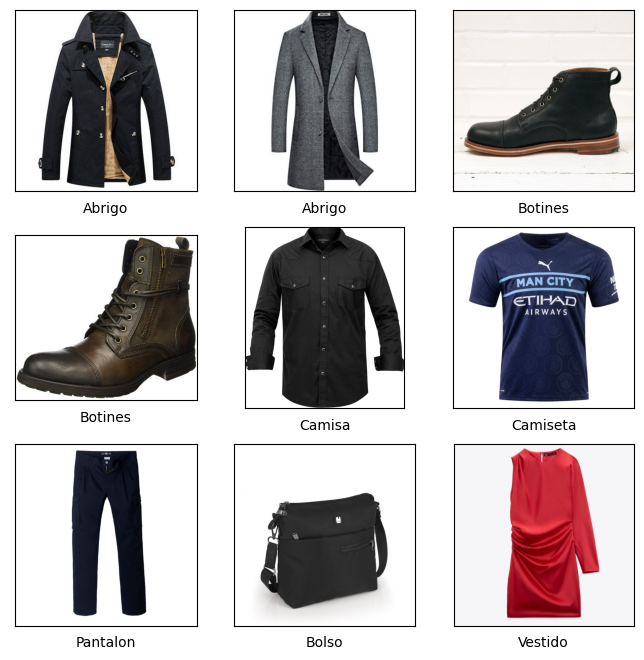

In [168]:
# Multiplot with labels
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original_images_list[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[np.argmax(images_prediction[i])])
    
plt.show()